<a href="https://colab.research.google.com/github/kiran8765467/iris-flower-classification/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install -q scikit-learn matplotlib seaborn


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Load the Iris dataset from scikit-learn
iris = load_iris()

# Convert the dataset into a pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Display the first few rows of the dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


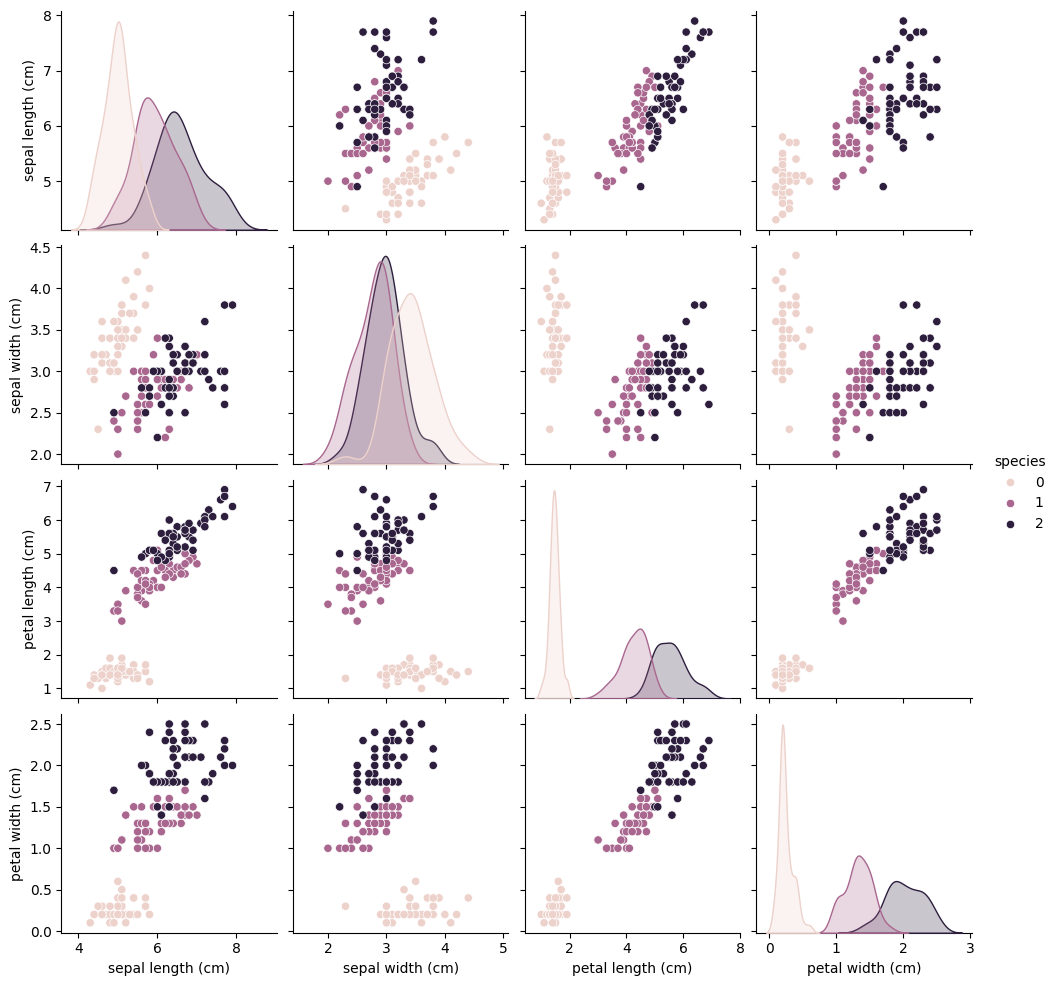

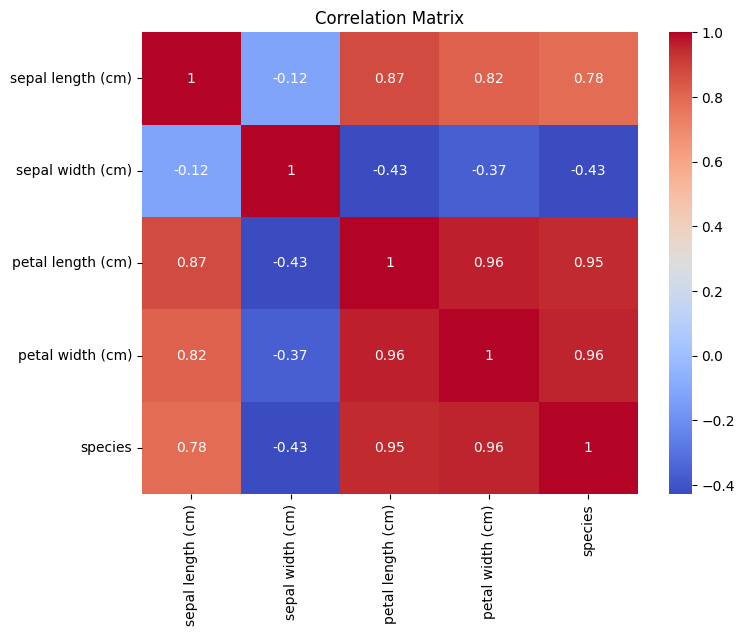

In [5]:
# Visualize the distribution of each feature
sns.pairplot(df, hue="species")
plt.show()

# Visualize the correlation between features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [6]:
# Features (X) and Target (y)
X = df.drop(columns=['species'])
y = df['species']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [8]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Display the first 10 predictions
y_pred[:10]


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

Accuracy: 100.00%


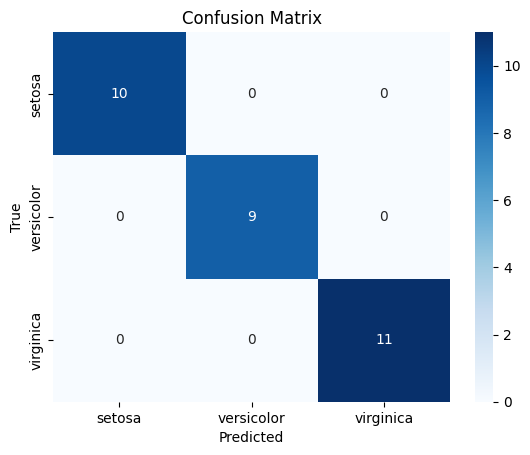

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [9]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


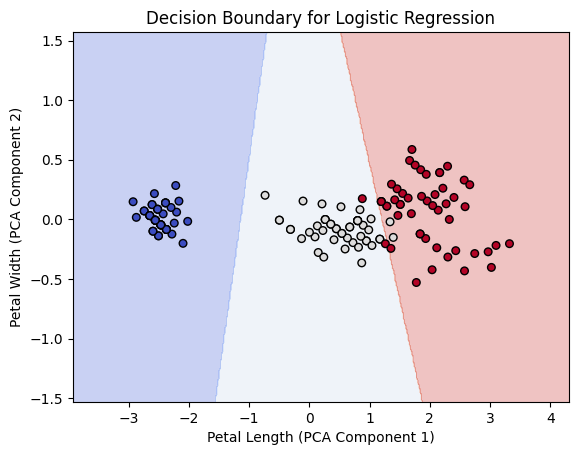

In [10]:
# Visualizing decision boundaries
from sklearn.decomposition import PCA

# Reduce the dataset to two dimensions (petal length and petal width)
X_reduced = X[['petal length (cm)', 'petal width (cm)']]

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_reduced)

# Split the reduced data into training and test sets
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the model again on the reduced data
model.fit(X_train_reduced, y_train)

# Create a mesh grid for plotting decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions for the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
plt.xlabel('Petal Length (PCA Component 1)')
plt.ylabel('Petal Width (PCA Component 2)')
plt.title('Decision Boundary for Logistic Regression')
plt.show()


In [11]:
import joblib

# Save the model
joblib.dump(model, 'iris_flower_model.pkl')

# To load the model later:
# model = joblib.load('iris_flower_model.pkl')


['iris_flower_model.pkl']

In [13]:
# Example input for new flower (sepal length, sepal width, petal length, petal width)
new_flower = np.array([[5.1, 3.5]])

# Predict the species
predicted_species = model.predict(new_flower)

# Print the prediction
print("Predicted species:", iris.target_names[predicted_species][0])


Predicted species: virginica


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
